In [ ]:
+ import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
survivors = pd.read_csv("survivors.csv")
mortality = pd.read_csv("deaths.csv")

In [ ]:
survivors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3432 non-null   int64  
 1   age                       3432 non-null   float64
 2   anaemia                   3432 non-null   int64  
 3   creatinine_phosphokinase  3432 non-null   int64  
 4   diabetes                  3432 non-null   int64  
 5   ejection_fraction         3432 non-null   int64  
 6   high_blood_pressure       3432 non-null   int64  
 7   platelets                 3432 non-null   float64
 8   serum_creatinine          3432 non-null   float64
 9   serum_sodium              3432 non-null   int64  
 10  sex                       3432 non-null   int64  
 11  smoking                   3432 non-null   int64  
 12  time                      3432 non-null   int64  
 13  DEATH_EVENT               3432 non-null   int64  
dtypes: float

In [ ]:
survivors["anaemia"].value_counts()

0    1867
1    1565
Name: anaemia, dtype: int64

In [ ]:
male = pd.read_csv("Male.csv")
female = pd.read_csv("Female.csv")

In [ ]:
male["DEATH_EVENT"].value_counts()

0    2154
1    1074
Name: DEATH_EVENT, dtype: int64

In [ ]:
maleSurvivor = pd.read_csv("maleSurvivor.csv")
femaleSurvivor = pd.read_csv("femaleSurvivors.csv")
maleMortality = pd.read_csv("MaleDeaths.csv")
femaleMortality = pd.read_csv("femaleDeath.csv")


In [ ]:
survivors["Platelet Risk"] = pd.cut(x=survivors["platelets"], bins = [0,400000,survivors["platelets"].max()], labels = ["No Risk","High Risk"])
mortality["Platelet Risk"] = pd.cut(x=mortality["platelets"], bins = [0,400000,mortality["platelets"].max()], labels = ["No Risk","High Risk"])
male["Platelet Risk"] = pd.cut(x=male["platelets"], bins = [0,400000,male["platelets"].max()], labels = ["No Risk","High Risk"])
female["Platelet Risk"] = pd.cut(x=female["platelets"], bins = [0,400000,female["platelets"].max()], labels = ["No Risk","High Risk"])
maleSurvivor["Platelet Risk"] = pd.cut(x=maleSurvivor["platelets"], bins = [0,400000,maleSurvivor["platelets"].max()], labels = ["No Risk","High Risk"])
maleMortality["Platelet Risk"] = pd.cut(x=maleMortality["platelets"], bins = [0,400000,maleMortality["platelets"].max()], labels = ["No Risk","High Risk"])
femaleSurvivor["Platelet Risk"] = pd.cut(x=femaleSurvivor["platelets"], bins = [0,400000,femaleSurvivor["platelets"].max()], labels = ["No Risk","High Risk"])
femaleMortality["Platelet Risk"] = pd.cut(x=femaleMortality["platelets"], bins = [0,400000,femaleMortality["platelets"].max()], labels = ["No Risk","High Risk"])



In [ ]:
survivors["Platelet Risk"]

0         No Risk
1         No Risk
2         No Risk
3         No Risk
4         No Risk
          ...    
3427      No Risk
3428      No Risk
3429    High Risk
3430      No Risk
3431      No Risk
Name: Platelet Risk, Length: 3432, dtype: category
Categories (2, object): ['No Risk' < 'High Risk']

In [ ]:
mortality["Platelet Risk"]

0       High Risk
1         No Risk
2         No Risk
3         No Risk
4         No Risk
          ...    
1563      No Risk
1564      No Risk
1565      No Risk
1566      No Risk
1567      No Risk
Name: Platelet Risk, Length: 1568, dtype: category
Categories (2, object): ['No Risk' < 'High Risk']

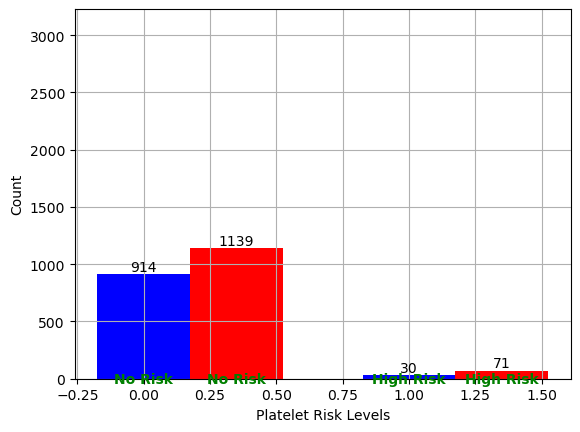

In [ ]:
counts = maleSurvivor.groupby(['Platelet Risk', 'anaemia']).size().unstack(fill_value=0)
index = range(len(counts))
bar_width = 0.35
fig, ax = plt.subplots()
bars1 = plt.bar(index, counts[1], bar_width, label='False', color='blue')
bars2 = plt.bar([i + bar_width for i in index], counts[0], bar_width, label='True', color='red')
ax.set_title = ("Count Plot of Platelet Risk and Anaemia for male survivor")
plt.xlabel("Platelet Risk Levels")
ax.set_ylim(0,len(male))
plt.ylabel("Count")

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    max_height = max(bar1.get_height(), bar2.get_height())
    soduim_level = counts.index[i]
    plt.text(bar1.get_x() + bar1.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "green")
    plt.text(bar2.get_x() + bar2.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "green")

plt.grid()
plt.show()

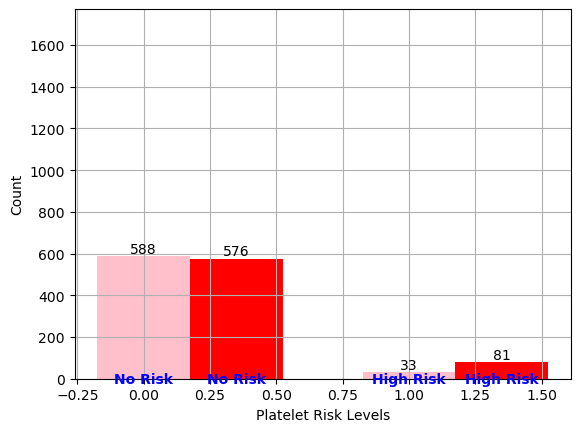

In [ ]:
counts = femaleSurvivor.groupby(['Platelet Risk', 'anaemia']).size().unstack(fill_value=0)
index = range(len(counts))
bar_width = 0.35
fig, ax = plt.subplots()
bars1 = plt.bar(index, counts[1], bar_width, label='False', color='pink')
bars2 = plt.bar([i + bar_width for i in index], counts[0], bar_width, label='True', color='red')
ax.set_title = ("Count Plot of Platelet Risk and Anaemia for Female survivor")
plt.xlabel("Platelet Risk Levels")
ax.set_ylim(0,len(female))
plt.ylabel("Count")

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    max_height = max(bar1.get_height(), bar2.get_height())
    soduim_level = counts.index[i]
    plt.text(bar1.get_x() + bar1.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "blue")
    plt.text(bar2.get_x() + bar2.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "blue")

plt.grid()
plt.show()

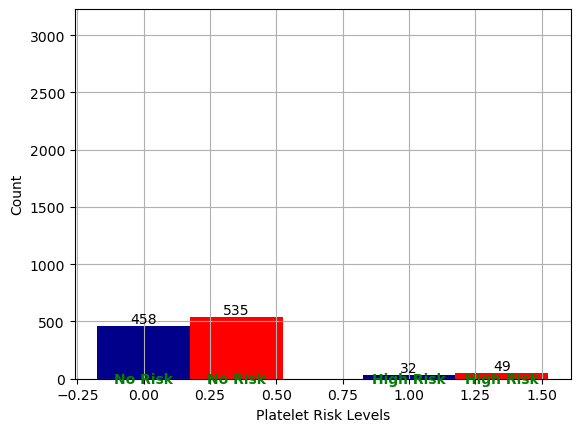

In [ ]:
counts = maleMortality.groupby(['Platelet Risk', 'anaemia']).size().unstack(fill_value=0)
index = range(len(counts))
bar_width = 0.35
fig, ax = plt.subplots()
bars1 = plt.bar(index, counts[1], bar_width, label='False', color='darkblue')
bars2 = plt.bar([i + bar_width for i in index], counts[0], bar_width, label='True', color='red')
ax.set_title = ("Count Plot of Platelet Risk and Anaemia for male mortality")
plt.xlabel("Platelet Risk Levels")
ax.set_ylim(0,len(male))
plt.ylabel("Count")

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    max_height = max(bar1.get_height(), bar2.get_height())
    soduim_level = counts.index[i]
    plt.text(bar1.get_x() + bar1.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "green")
    plt.text(bar2.get_x() + bar2.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "green")

plt.grid()
plt.show()

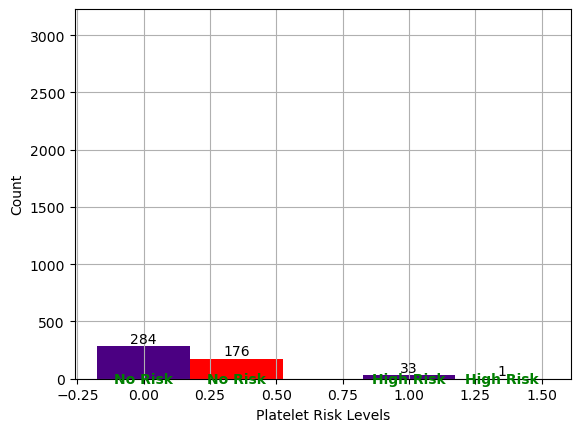

In [ ]:
counts = femaleMortality.groupby(['Platelet Risk', 'anaemia']).size().unstack(fill_value=0)
index = range(len(counts))
bar_width = 0.35
fig, ax = plt.subplots()
bars1 = plt.bar(index, counts[1], bar_width, label='False', color='indigo')
bars2 = plt.bar([i + bar_width for i in index], counts[0], bar_width, label='True', color='red')
ax.set_title = ("Count Plot of Platelet Risk and Anaemia for male mortality")
plt.xlabel("Platelet Risk Levels")
ax.set_ylim(0,len(male))
plt.ylabel("Count")

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    max_height = max(bar1.get_height(), bar2.get_height())
    soduim_level = counts.index[i]
    plt.text(bar1.get_x() + bar1.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "green")
    plt.text(bar2.get_x() + bar2.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "green")

plt.grid()
plt.show()

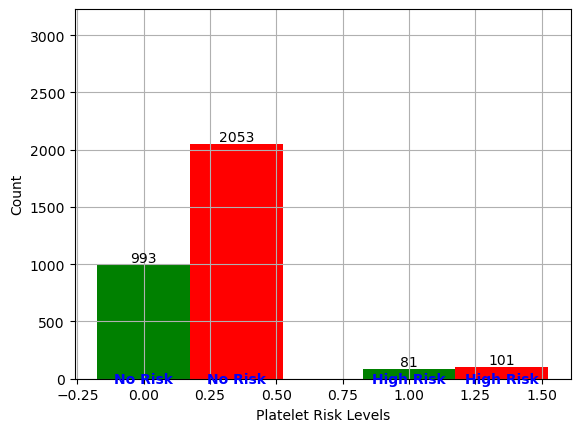

In [ ]:
counts = male.groupby(['Platelet Risk', 'DEATH_EVENT']).size().unstack(fill_value=0)
index = range(len(counts))
bar_width = 0.35
fig, ax = plt.subplots()
bars1 = plt.bar(index, counts[1], bar_width, label='False', color='green')
bars2 = plt.bar([i + bar_width for i in index], counts[0], bar_width, label='True', color='red')
ax.set_title = ("Count Plot of Platelet Risk and Anaemia for males")
plt.xlabel("Platelet Risk Levels")
ax.set_ylim(0,len(male))
plt.ylabel("Count")

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    max_height = max(bar1.get_height(), bar2.get_height())
    soduim_level = counts.index[i]
    plt.text(bar1.get_x() + bar1.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "blue")
    plt.text(bar2.get_x() + bar2.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "blue")

plt.grid()
plt.show()

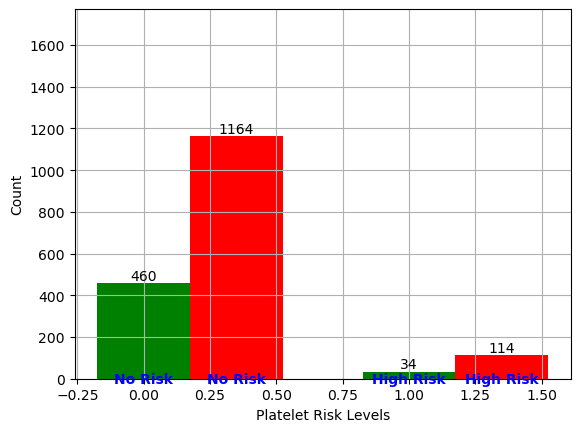

In [ ]:
counts = female.groupby(['Platelet Risk', 'DEATH_EVENT']).size().unstack(fill_value=0)
index = range(len(counts))
bar_width = 0.35
fig, ax = plt.subplots()
bars1 = plt.bar(index, counts[1], bar_width, label='False', color='green')
bars2 = plt.bar([i + bar_width for i in index], counts[0], bar_width, label='True', color='red')
ax.set_title = ("Count Plot of Platelet Risk and Anaemia for females")
plt.xlabel("Platelet Risk Levels")
ax.set_ylim(0,len(female))
plt.ylabel("Count")

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom')

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    max_height = max(bar1.get_height(), bar2.get_height())
    soduim_level = counts.index[i]
    plt.text(bar1.get_x() + bar1.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "blue")
    plt.text(bar2.get_x() + bar2.get_width() / 2, -0.5, soduim_level, ha='center', va='center', weight = "bold", color = "blue")

plt.grid()
plt.show()